# Тема 9. Критерии

In [1]:
import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm

### 1 Задание

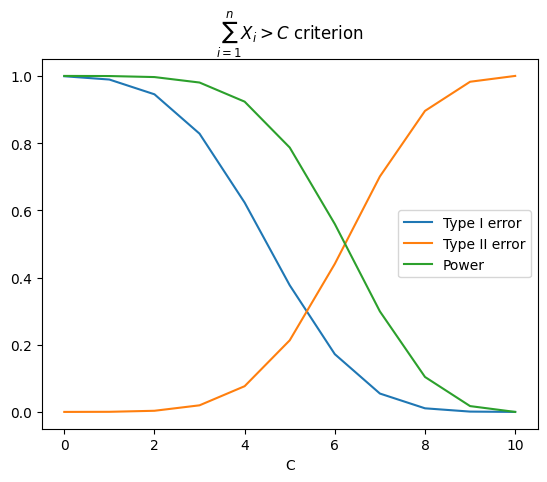

In [2]:
n = 10
theta_0 = 0.5
theta_1 = 2/3

C = np.arange(n + 1)
cdf_0 = st.binom.cdf(C, n, theta_0)
cdf_1 = st.binom.cdf(C, n, theta_1)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(C, 1-cdf_0, label="Type I error")
ax.plot(C, cdf_1, label="Type II error")
ax.plot(C, 1-cdf_1, label="Power")
ax.set_xlabel("C")
ax.set_title(r"$\sum_{i=1}^n X_i > C$ criterion")
ax.legend();

### 2 Задание

Рассмотрим критерий $ T > C $.

Пусть $ F_0 $ - ф.р. $ T $ при гипотезе, $ F_1 $ - при альтернативе.

p-value = $ 1 - F_0(T) $

При верной гипотезе получаем равномерное распределение.

При верной альтернативе получаем мощность критерия с уровнем значимости $ \alpha $.

$$
    F_{p-value}(\alpha) = \textbf{P}(1 - F_0(T) \leq \alpha) = P(F_0(T) \geq 1 - \alpha) = P(T \geq F_0 ^{-1} (1 - \alpha))
$$

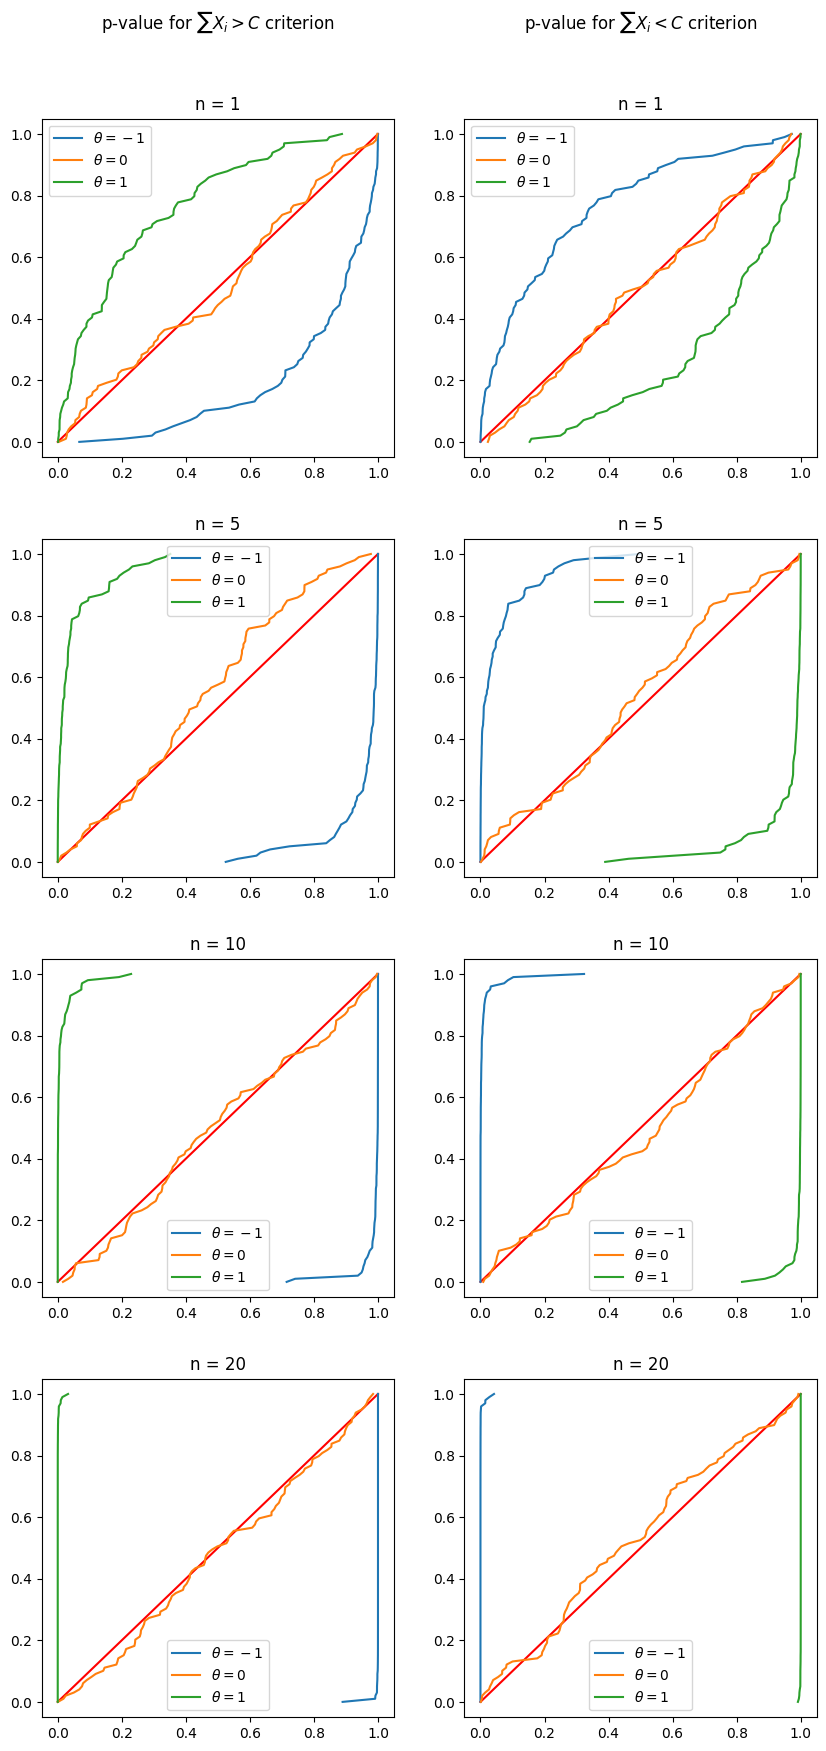

In [3]:
Ns = (1, 5, 10, 20)
k = 100
thetas = (-1, 0, 1)

width, height = 2 * 5, (1 + len(Ns)) * 4
fig, axes = plt.subplots(1 + len(Ns), 2, figsize=(width, height), gridspec_kw={"height_ratios":[0]+[1]*len(Ns)})
fig.subplots_adjust(top = 1 - 1/height, hspace=0.3)

x = np.linspace(0, 1, k)
names = (
    fr"p-value for $\sum X_i > C$ criterion",
    fr"p-value for $\sum X_i < C$ criterion"
)
for j, (ax, name) in enumerate(zip(axes[0], names)):
    ax.axis("off")
    ax.set_title(name)
    for i, n in enumerate(Ns, 1):
        ax = axes[i, j]
        ax.set_title(f"n = {n}")
        ax.plot(x, x, c='r')
        for theta in thetas:
            samples = st.norm.rvs(loc=theta, size=(k, n))
            sums = np.sum(samples, axis=1)
            if j == 0:
                p_value = 1 - st.norm.cdf(sums, scale=mt.sqrt(n))
            if j == 1:
                p_value = st.norm.cdf(sums, scale=mt.sqrt(n))
            p_value = np.sort(p_value)
            ax.plot(p_value, x, label=fr"$\theta = {theta}$")
            ax.legend()
plt.savefig("dasha.png")

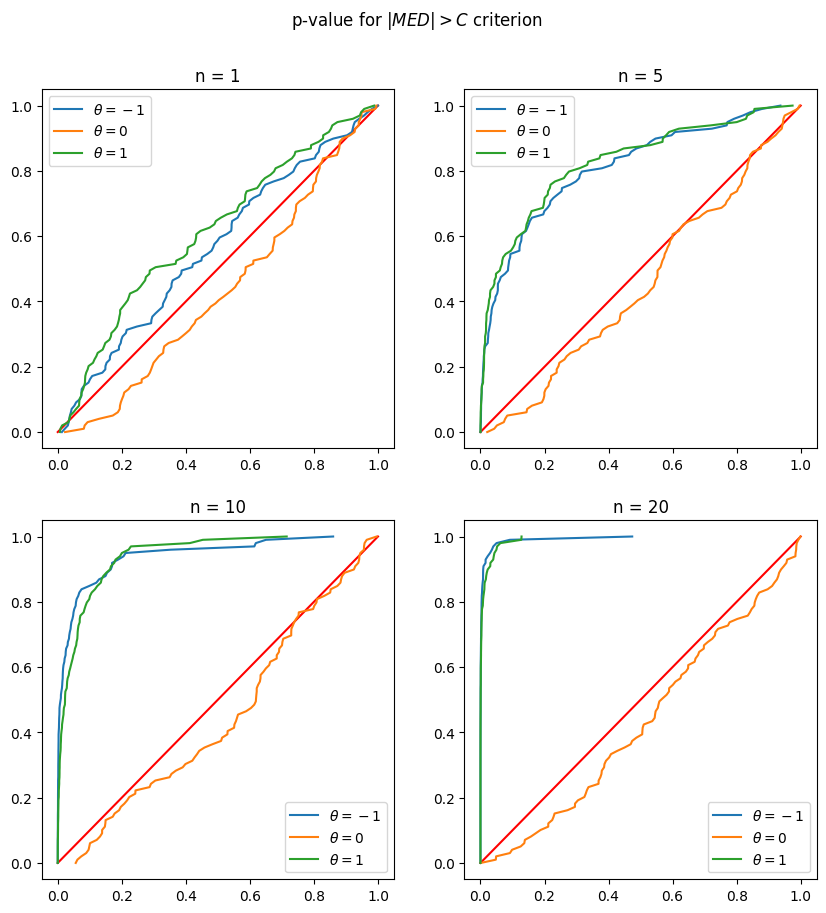

In [4]:
Ns = (1, 5, 10, 20)
k = 100
thetas = (-1, 0, 1)

width, height = 2 * 5, (len(Ns) + 1) // 2 * 5
fig, axes = plt.subplots(height // 5, 2, figsize=(width, height))
fig.subplots_adjust(top = 1 - 1/height, hspace=0.2)

x = np.linspace(0, 1, k)
fig.suptitle(r"p-value for $|MED| > C$ criterion")
for i, n in enumerate(Ns):
    ax = axes[i // 2, i % 2]
    ax.set_title(f"n = {n}")
    ax.plot(x, x, c='r')
    for theta in thetas:
        samples = st.norm.rvs(loc=theta, size=(k, n))
        T = np.abs(np.median(samples, axis=1))
        p_value = 1 - (st.norm.cdf(T, scale=mt.sqrt(mt.pi / 2 / n)) - st.norm.cdf(-T, scale=mt.sqrt(mt.pi / 2 / n)))
        p_value = np.sort(p_value)
        ax.plot(p_value, x, label=fr"$\theta = {theta}$")
        ax.legend()

### 3 Задание

In [5]:
n = 10
theta_0 = 0.5
theta_1 = 1/3
level = 0.05

for n in range(1, 110):
    for c in range(n + 1):
        alpha, beta = st.binom.cdf([c, c], n, [theta_0, theta_1])
        if max(alpha, 1 - beta) < level:
            print(n)
            break

98
100
102
103
104
105
106
107
108
109


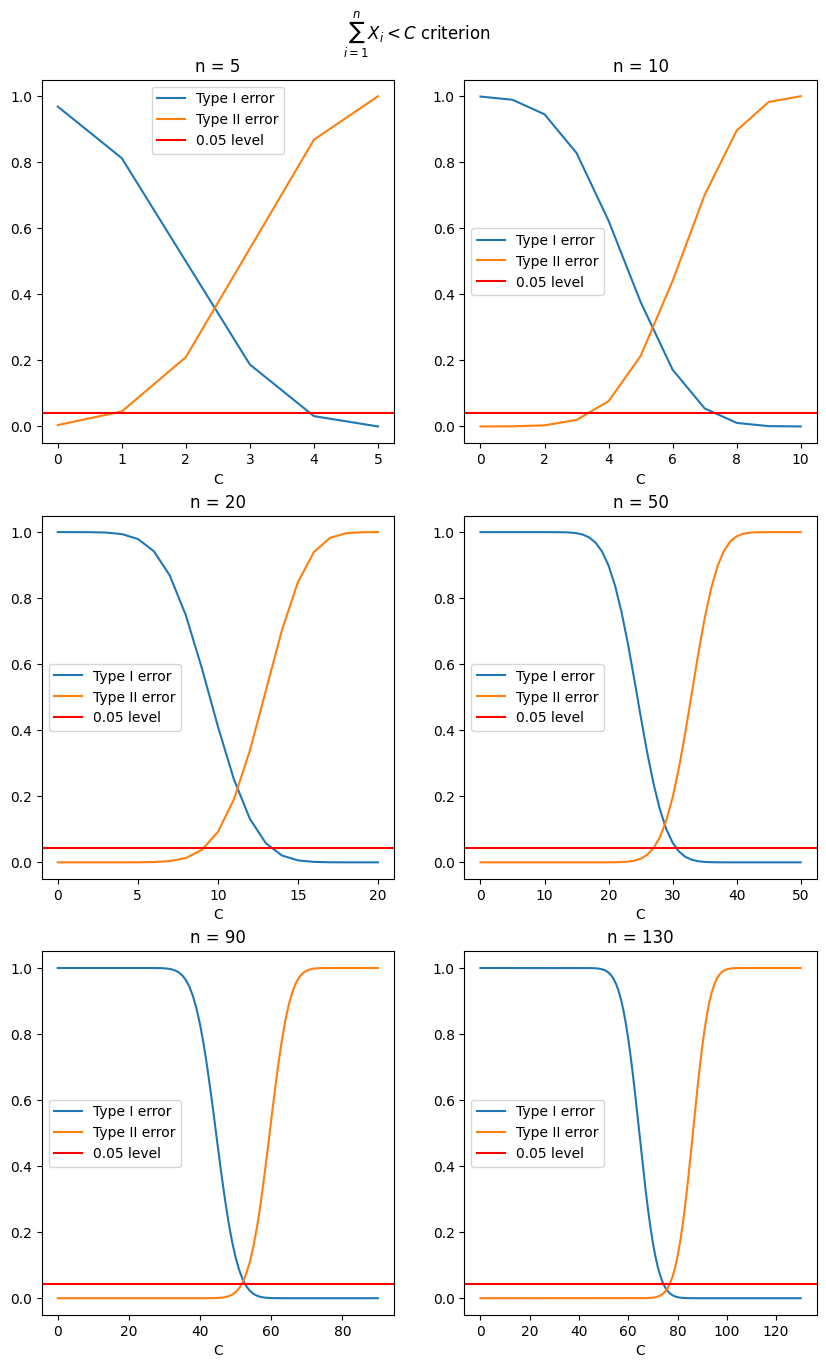

In [6]:
Ns = (5, 10, 20, 50, 90, 130)
theta_0 = 0.5
theta_1 = 2/3
level = 0.05

width, height = 2 * 5, (len(Ns) + 1) // 2 * 5
fig, axes = plt.subplots(height // 5, 2, figsize=(width, height))
fig.subplots_adjust(top = 1 - 1/height, hspace=0.2)

x = np.linspace(0, 1, k)
fig.suptitle(r"$\sum_{i=1}^n X_i < C$ criterion")
for i, n in enumerate(Ns):
    ax = axes[i // 2, i % 2]
    ax.set_title(f"n = {n}")
    C = np.arange(n + 1)
    cdf_0 = st.binom.cdf(C, n, theta_0)
    cdf_1 = st.binom.cdf(C, n, theta_1)
    ax.plot(C, 1-cdf_0, label="Type I error")
    ax.plot(C, cdf_1, label="Type II error")
    ax.axhline(alpha, c='r', label=f"{level} level")
    ax.set_xlabel("C")
    ax.legend();